In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('../input/full-filled-brain-stroke-dataset/full_data.csv')

In [3]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
df.shape

(4981, 11)

In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
df_cate = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]

In [8]:
for i in df_cate.columns:
    print(df_cate[i].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
df['gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace=True)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [11]:
data=pd.get_dummies(df, columns=['work_type', 'smoking_status'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


In [12]:
data.shape

(4981, 17)

In [13]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['stroke'])
Y=data['stroke']
print(X.shape)
print(Y.shape)

(4981, 16)
(4981,)


In [14]:
Y.value_counts(normalize=True)  # This is imbalanced dataset

0    0.950211
1    0.049789
Name: stroke, dtype: float64

<AxesSubplot:>

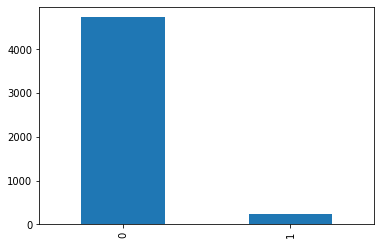

In [15]:
Y.value_counts().plot(kind='bar')

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(3984, 16)
(997, 16)


In [17]:
Y_train.value_counts()

0    3786
1     198
Name: stroke, dtype: int64

In [18]:
Y_test.value_counts()

0    947
1     50
Name: stroke, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train, Y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
y_train_pred=model1.predict(X_train)
train_accuracy=accuracy_score(Y_train,y_train_pred)
train_accuracy

0.9505522088353414

In [21]:
confusion_matrix(Y_train, y_train_pred)

array([[3786,    0],
       [ 197,    1]])

True Positive Rate 100% but True Negative rate is 0.5% very low. Our interest on the minority class so the accuracy_score is not a good metric for the imbalanced data set.

In [22]:
y_test_pred=model1.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
test_accuracy

0.9498495486459378

In [23]:
confusion_matrix(Y_test, y_test_pred)

array([[947,   0],
       [ 50,   0]])

In [24]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier(max_depth=10)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [25]:
y_train_pred=model.predict(X_train)
y_train_accuracy=accuracy_score(Y_train, y_train_pred)
y_train_accuracy

0.9751506024096386

In [26]:
y_test_pred=model.predict(X_test)
y_test_accuracy=accuracy_score(Y_test, y_test_pred)
y_test_accuracy

0.9237713139418254

In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
X_resample, Y_resample=smote.fit_resample(X, Y)
Y_resample.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, Y_resample, test_size=0.2, random_state=1)

In [29]:
model=LogisticRegression()
model.fit(X_train, Y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, y_train_pred)
print(train_accuracy)

0.9193079767564712


In [31]:
confusion_matrix(Y_train, y_train_pred)

array([[3585,  190],
       [ 421, 3376]])

In [32]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
print(test_accuracy)

0.9076029567053854


In [33]:
confusion_matrix(Y_test, y_test_pred)

array([[895,  63],
       [112, 824]])

In [34]:
# Support Vector Machine
from sklearn.svm import SVC
model=SVC(kernel='linear', random_state=1)
model.fit(X_train, Y_train)


SVC(kernel='linear', random_state=1)

In [35]:
y_train_pred=model.predict(X_train)
accuracy_score(Y_train,y_train_pred)

0.9219492868462758

In [36]:
y_test_pred=model.predict(X_test)
accuracy_score(Y_test, y_test_pred)

0.9171066525871172

In [37]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
y_train_pred=model.predict(X_train)
y_train_accuracy=accuracy_score(Y_train, y_train_pred)
y_train_accuracy

0.8423137876386688

In [39]:
y_test_pred=model.predict(X_test)
y_test_accuracy=accuracy_score(Y_test, y_test_pred)
y_test_accuracy

0.8252375923970433

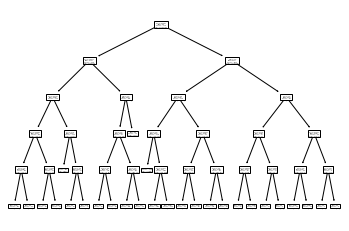

In [40]:
from sklearn.tree import plot_tree
from sklearn import tree
tree.plot_tree(model)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [42]:
y_train_pred=model.predict(X_train)
y_train_accuracy=accuracy_score(Y_train, y_train_pred)
y_train_accuracy

1.0

In [43]:
y_test_pred=model.predict(X_test)
y_test_accuracy=accuracy_score(Y_test, y_test_pred)
y_test_accuracy

0.9688489968321014

In [44]:
#XGBoosting
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,Y_train)


GradientBoostingClassifier()

In [45]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, y_train_pred)
train_accuracy

0.9495509772847333

In [46]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
test_accuracy

0.9345300950369588